In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Creating dataframe from CSV
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
data.head(5)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046.0    Male  67.0             0              1          Yes   
1  51676.0  Female  61.0             0              0          Yes   
2      NaN    Male  80.0             0              1          Yes   
3  60182.0  Female  49.0             0              0          Yes   
4   1665.0  Female  79.0             1              0          NaN   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
#checking for the null values
data.isnull().sum()

id                    87
gender                10
age                    3
hypertension           0
heart_disease          0
ever_married          10
work_type              0
Residence_type        10
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data.drop(columns=['id'], inplace=True)

In [ ]:
data['bmi'].replace(np.nan, data['bmi'].mean(), inplace=True)

In [ ]:
data.dropna(subset=["gender","age","ever_married","Residence_type"], inplace=True)

In [ ]:
data.shape

(5078, 11)

In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5078 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5078 non-null   object 
 1   age                5078 non-null   float64
 2   hypertension       5078 non-null   int64  
 3   heart_disease      5078 non-null   int64  
 4   ever_married       5078 non-null   object 
 5   work_type          5078 non-null   object 
 6   Residence_type     5078 non-null   object 
 7   avg_glucose_level  5078 non-null   float64
 8   bmi                5078 non-null   float64
 9   smoking_status     5078 non-null   object 
 10  stroke             5078 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 476.1+ KB


In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# **EXPLORATORY DATA ANALYSIS**

                        age  hypertension  heart_disease  avg_glucose_level  \
age                1.000000      0.275530       0.263844           0.236016   
hypertension       0.275530      1.000000       0.105361           0.171142   
heart_disease      0.263844      0.105361       1.000000           0.159080   
avg_glucose_level  0.236016      0.171142       0.159080           1.000000   
bmi                0.326248      0.160672       0.034561           0.168882   
stroke             0.245764      0.128099       0.127990           0.128992   

                        bmi    stroke  
age                0.326248  0.245764  
hypertension       0.160672  0.128099  
heart_disease      0.034561  0.127990  
avg_glucose_level  0.168882  0.128992  
bmi                1.000000  0.038139  
stroke             0.038139  1.000000  


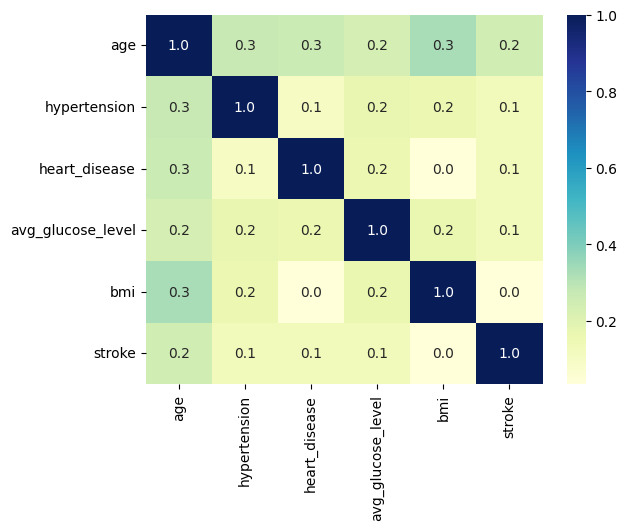

In [ ]:
#Checking correlation of features with the target variable using heatmap
print(data.corr())
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, fmt=".1f")
plt.show()


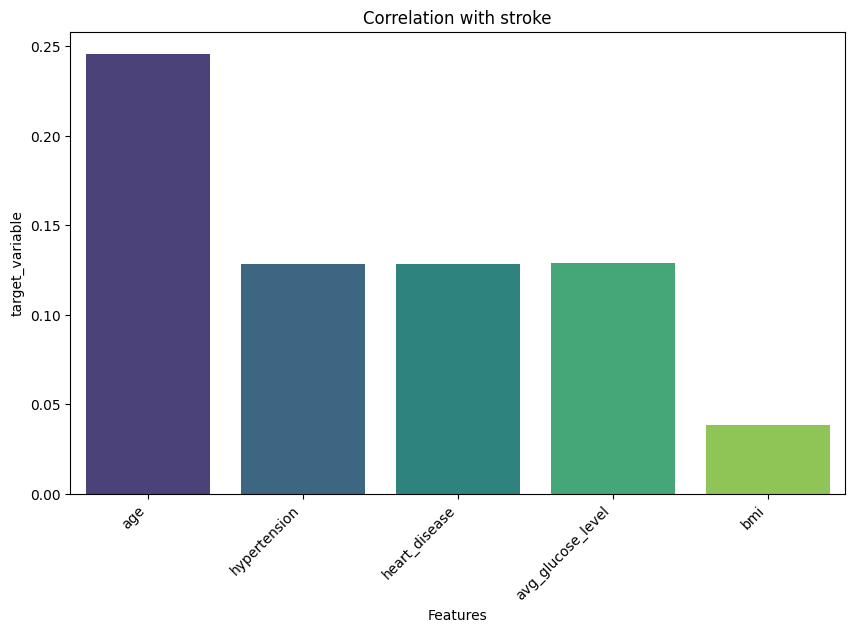

In [ ]:
target_variable = 'stroke'
feature_variable = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

correlation_matrix = data.corr()
target_correlations = correlation_matrix[target_variable].drop(target_variable)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_correlations.index, y=target_correlations.values, palette="viridis")
plt.title(f'Correlation with {target_variable}')
plt.xlabel('Features')
plt.ylabel('target_variable')
plt.xticks(rotation=45, ha='right')
plt.show()



*   We can see from the above heatmap that age is higly correlated with the death event. If the age of a person is high then there is a good chance of them dying.
*   The other observation from the heatmap is that the time which is follow up time is negatively correlated that means the higher the follow up time is the lower the chances of death are. Because as much as a person will go for checkup there is a lesser chance of death because anything wrong can be detected on early stage.


*   We can see that serum creatanine is also highly positively correlated with the death event.
*   Ejection fraction and serum sodium are also negatively correlated with the death event.





In [ ]:
data.head(5)

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
5       1  81.0             0              0             1          2   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
5               1             186.21  29.000000               1       1

## Machine learning Modeling

Fisrt making the training and testing data to train our model in the ratio of 80:20.

In [ ]:
#splitting data into feature and target
X = data.drop('stroke',axis=1)
y = data['stroke']

In [ ]:
from sklearn.model_selection import train_test_split

# split into 80:20 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

# describes info about train and test set
print("stroke X_train dataset: ", X_train.shape)
print("stroke y_train dataset: ", y_train.shape)
print("stroke X_test dataset: ", X_test.shape)
print("stroke y_test dataset: ", y_test.shape)

stroke X_train dataset:  (4062, 10)
stroke y_train dataset:  (4062,)
stroke X_test dataset:  (1016, 10)
stroke y_test dataset:  (1016,)


In [ ]:
data['stroke'].value_counts()

0    4845
1     233
Name: stroke, dtype: int64

In [ ]:
data['gender'] = pd.to_numeric(data['gender'], errors='coerce')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
le = LabelEncoder()
text_cols = list(data.select_dtypes(include=['object']).columns)


l3 = []; l4 = [];
print('Label Encoder Transformation')
for i in tqdm(text_cols):
    data[i] = le.fit_transform(data[i])
    l3.append(list(data[i].unique())); l4.append(list(le.inverse_transform(data[i].unique())))
    print(i,' : ',data[i].unique(),' = ',le.inverse_transform(data[i].unique()))

Label Encoder Transformation


0it [00:00, ?it/s]


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled_2, y_resampled_2 = smote.fit_resample(X_test, y_test)



**1.   Logistic Regression**



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
clf_lr = LogisticRegression()
clf_lr.fit(X_resampled, y_resampled)
y_pred_lr = clf_lr.predict(X_resampled_2)
accuracy_logistic = accuracy_score(y_resampled_2, y_pred_lr)
roc_auc_logistic = roc_auc_score(y_resampled_2, y_pred_lr)

print("Accuracy (Logistic Regression):", accuracy_logistic)
print("AUC-ROC (Logistic Regression):", roc_auc_logistic)

Accuracy (Logistic Regression): 0.7669404517453798
AUC-ROC (Logistic Regression): 0.7669404517453798


In [ ]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.1, 0.5, 1.0, 1.5],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# Create GridSearchCV object with accuracy and AUC-ROC as scoring metrics
grid_search = GridSearchCV(clf_lr, param_grid, cv=5, scoring={'accuracy': 'accuracy', 'roc_auc': 'roc_auc'},
                           refit='roc_auc', verbose=1, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_resampled, y_resampled)
# Print the best parameters and the corresponding metrics
print("Best parameters for Logistic Regression: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters for Logistic Regression:  {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.91


Here we are tuning the model using hyper-parameters. Since it is for logistic regression, we are taking three parameters. We can take more parameters like class weight, dual, toll since it is a healthcare dataset but not to make it more complex we are just using these 3 hyperparameters which can be defined as follows:


*   'C' represents regularization strength to prevent overfitting in logistic regression. The smaller the value of C,the stronger the regularization.
*   'Penalty' represents type of regularization. L1 is lasso which says the sum of the absolute values of all the things (coefficients) in the equation shouldn't be too big. L2 regularization says the sum of the squares of all the things (coefficients) shouldn't be too big. L1 omits some values but L2 will take all the features.


*   The last feature is 'solver' which is defined the optimization algorithm to use. Here we are using liblinear because the dataset is not to big.





As we can see that the accuracy is increased in terms of AUC-ROC which means it differentiated between two classes that means true positive and true negative accurately. But the normal original accuracy is same.

2. **Decision Tree**

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_resampled, y_resampled)
y_pred_DT = DT.predict(X_resampled_2)
accuracy_decision = accuracy_score(y_resampled_2, y_pred_DT)
roc_auc_decision = roc_auc_score(y_resampled_2, y_pred_DT)

print("Accuracy (Decision Tree):", accuracy_decision)
print("AUC-ROC (Decision Tree):", roc_auc_decision)

Accuracy (Decision Tree): 0.7084188911704312
AUC-ROC (Decision Tree): 0.7084188911704311


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 6, 9, 12],
    'splitter' : ['best', 'random'],
    'max_features' : [None, 'auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object with accuracy and AUC-ROC as scoring metrics
grid_search = GridSearchCV(DT, param_grid, cv=5, scoring={'accuracy': 'accuracy', 'roc_auc': 'roc_auc'},
                           refit='roc_auc', verbose=1, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_resampled, y_resampled)
roc_auc_decision = roc_auc_score(y_resampled_2, y_pred_DT)

# Print the best parameters and the corresponding metrics
print("Best parameters for Decision Tree: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}
Best cross-validation accuracy: 0.94


Tuning the model to check whether the accuracy get changed or not. Here we are using the parameters as follows:


*   criterion: This parameter determines the function used to measure the quality of a split in the decision tree. The possible values are:

'gini': It measures the impurity of a node by Gini impurity.

'entropy': It uses the information gain based on entropy.

'log_loss': This is typically used for logistic regression problems and represents the logistic loss.
*   max_depth: The maximum depth of the decision tree. It controls the maximum number of levels in the tree.



*   splitter: This parameter specifies the strategy used to choose the split at each node. The options are:

'best': Chooses the best split based on a certain criterion (specified by the criterion parameter).
'random': Chooses the best random split.
*   max_features: The number of features to consider when looking for the best split. The options are:

None: All features are considered.

'auto': It is equivalent to 'sqrt', and it considers the square root of the total number of features.

'sqrt': It considers the square root of the total number of features.

'log2': It considers the logarithm base 2 of the total number of features.


*   min_samples_split: The minimum number of samples required to split an internal node. It controls the minimum size of a node.
*   min_samples_leaf: The minimum number of samples required to be at a leaf node. It controls the minimum size of a leaf node.









As we can see that the accuracy increase to 81%

**3. Random Forest**

In [ ]:
clf_RF = RandomForestClassifier()
clf_RF.fit(X_resampled, y_resampled)
y_pred_RF = clf_RF.predict(X_resampled_2)
accuracy_random = accuracy_score(y_resampled_2, y_pred_RF)
roc_auc_random = roc_auc_score(y_resampled_2, y_pred_RF)

print("Accuracy (Random Forest):", accuracy_random)
print("AUC-ROC (Random Forest):", roc_auc_random)

Accuracy (Random Forest): 0.7428131416837782
AUC-ROC (Random Forest): 0.7428131416837782


In [ ]:
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'max_depth': [3, 6, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' : ['gini', 'entropy', 'log_loss']

}

# Create GridSearchCV object with accuracy and AUC-ROC as scoring metrics
grid_search = GridSearchCV(clf_RF, param_grid, cv=5, scoring={'accuracy': 'accuracy', 'roc_auc': 'roc_auc'},
                           refit='roc_auc', verbose=1, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters and the corresponding metrics
print("Best parameters for Random Forest: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy: 0.97


There are certain parameters which we use in random forest to change the accuracy for our prediction model. These can be given as follows:


*   n_estimators: A list of integers representing the number of trees in the random forest. It specifies the different values to be considered during the hyperparameter tuning process. For example, [25, 50, 75, 100] means the tuning process will consider random forests with 25, 50, 75, and 100 trees.
*   max_depth: A list of integers representing the maximum depth of the individual trees in the random forest. The values [3, 6, 9] mean the tuning process will consider trees with maximum depths of 3, 6, and 9.


*   min_samples_split: A list of integers representing the minimum number of samples required to split an internal node in each decision tree. The values [2, 5, 10] mean the tuning process will consider these different values.
*   min_samples_leaf: A list of integers representing the minimum number of samples required to be at a leaf node in each decision tree. The values [1, 2, 4] mean the tuning process will consider these different values.


*   max_features: A list of strings representing the number of features to consider when looking for the best split in each decision tree. The values ['auto', 'sqrt', 'log2'] mean the tuning process will consider random forests with all features, the square root of the total number of features, and the logarithm base 2 of the total number of features.
*   criterion: A list of strings representing the function used to measure the quality of a split in each decision tree. The values ['gini', 'entropy', 'log_loss'] mean the tuning process will consider random forests using Gini impurity, entropy, and logistic loss for classification problems.





So as we can see that the accuracy decreased.

**4. XG Booster**

In [ ]:
clf_XGB = XGBClassifier()
clf_XGB.fit(X_resampled, y_resampled)
y_pred_XGB = clf_XGB.predict(X_resampled_2)
accuracy_XGB = accuracy_score(y_resampled_2, y_pred_XGB)
roc_auc_XGB = roc_auc_score(y_resampled_2, y_pred_XGB)

print("Accuracy (XGBoost):", accuracy_XGB)
print("AUC-ROC (XGBoost):", roc_auc_XGB)

Accuracy (XGBoost): 0.7854209445585215
AUC-ROC (XGBoost): 0.7854209445585215


In [59]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'booster' : ['gbtree', 'gblinear', 'dart']
}

# Create GridSearchCV object with accuracy and AUC-ROC as scoring metrics
grid_search = GridSearchCV(clf_XGB, param_grid, cv=5, scoring={'accuracy': 'accuracy', 'roc_auc': 'roc_auc'},
                           refit='roc_auc', verbose=1, n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding metrics
print("Best parameters for XGBoost: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters for XGBoost:  {'booster': 'gbtree', 'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation accuracy: 0.86


The various parameters here we are using can be given as follows:


*   n_estimators: The number of boosting rounds or trees to build. It represents the total number of trees in the ensemble. For example, [50, 100, 200] means the tuning process will consider XGBoost models with 50, 100, and 200 trees.
*   max_depth: The maximum depth of a tree. It controls the maximum number of nodes from the root to the farthest leaf. A higher value can make the model more complex. For example, [3, 5, 7] means the tuning process will consider trees with maximum depths of 3, 5, and 7.


*   earning_rate: Also known as the "eta" parameter, it controls the step size shrinkage during each boosting round. A lower value makes the boosting process more conservative. For example, [0.01, 0.1, 0.2] means the tuning process will consider learning rates of 0.01, 0.1, and 0.2.
*   subsample: The fraction of training data to be randomly sampled for each boosting round. It controls the randomness of each tree's construction. For example, [0.8, 1.0] means the tuning process will consider using 80% or 100% of the training data for each boosting round.


*   colsample_bytree: The fraction of features to be randomly sampled for each tree. It controls the randomness of feature selection for each boosting round. For example, [0.8, 1.0] means the tuning process will consider using 80% or 100% of the features for each tree.
*   booster: The type of boosting model to be run. It can take three values:

'gbtree': Tree-based models (default).

'gblinear': Linear models.

'dart': Dropout-based models.






So the model accuracy is increased and it used these parameters {'booster': 'gbtree', 'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0} to increase the accuracy.

So here we are downloading the libraries eli5, Lime and shap for the further questions.

In [68]:
!pip install eli5 lime shap

## Interpretability and explainability

ELI5 is a python package that is used to inspect ML classifiers and explain their predictions. It is popularly used to debug algorithms such as sklearn regressors and classifiers, XGBoost, CatBoost, Keras, etc.

In [70]:
import eli5

In [71]:
X_resampled_2.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [72]:
feature_names= ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

Here, this is eli5 for Logistic regression:

In [73]:
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf_lr, random_state=1).fit(X_resampled_2, y_resampled_2)

# display weights using PermutationImportance object
eli5.show_weights(perm, feature_names = feature_names)

In [74]:
pos_entry = data[data['stroke'] == 1 ].drop(columns = ["stroke"], axis = 1)[0:1]
neg_entry = data[data['stroke'] == 0 ].drop(columns = ["stroke"], axis = 1)[173:174]

In [75]:
# Positive Label
eli5.show_prediction(clf_lr, pos_entry,feature_names = feature_names )

In [76]:
# Negative Label
eli5.explain_prediction(clf_lr, neg_entry, feature_names = feature_names)

Explanation(estimator="LogisticRegression(solver='liblinear')", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=4.353959963635614, std=None, value=1.0), FeatureWeight(feature='Residence_type', weight=1.1858842443579143, std=None, value=1.0), FeatureWeight(feature='ever_married', weight=0.8837768838064554, std=None, value=1.0), FeatureWeight(feature='work_type', weight=0.8336935476628781, std=None, value=2.0), FeatureWeight(feature='gender', weight=0.7752259134867658, std=None, value=1.0), FeatureWeight(feature='smoking_status', weight=0.47191756156607423, std=None, value=1.0)], neg=[FeatureWeight(feature='age', weight=-5.569719130080905, std=None, value=53.0), FeatureWeight(feature='avg_glucose_level', weight=-1.6144713026227033, std=None, value=211.03), FeatureWeight(feature='bmi', weight=-0.21180919410829674, std=None, value=34.2)], pos_remaining=0, neg_remaining=0), proba=0.751841614215841, score=-1.1084584877037962, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

Here, this is eli5 for Decision Tree.

In [77]:
# Step 1: Feature Importance
# Calculate feature importance
feature_names = X_resampled_2.columns.tolist()
feature_importance = eli5.explain_weights(DT, feature_names=feature_names)

# Display feature importance
print("Feature Importance:")
print(feature_importance)
eli5.explain_weights(DT, feature_names = feature_names)

Feature Importance:
Explanation(estimator='DecisionTreeClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=10)', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='age', weight=0.6121981943059273, std=None, value=None), FeatureWeight(feature='avg_glucose_level', weight=0.13727131297505396, std=None, value=None), FeatureWeight(feature='bmi', weight=0.08175258247793327, std=None, value=None), FeatureWeight(feature='work_type', weight=0.04395060818931088, std=None, value=None), FeatureWeight(feature='smoking_status', weight=0.04015673332635016, std=None, value=None), FeatureWeight(feature='Residence_type', weight=0.02727347291276859, std=None, value=None), FeatureWeight(feature='gender', weight=0.019734475174940584, std=None, value=None), FeatureWeight(feature='ever_married', we

Explanation(estimator='DecisionTreeClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=10)', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='age', weight=0.6121981943059273, std=None, value=None), FeatureWeight(feature='avg_glucose_level', weight=0.13727131297505396, std=None, value=None), FeatureWeight(feature='bmi', weight=0.08175258247793327, std=None, value=None), FeatureWeight(feature='work_type', weight=0.04395060818931088, std=None, value=None), FeatureWeight(feature='smoking_status', weight=0.04015673332635016, std=None, value=None), FeatureWeight(feature='Residence_type', weight=0.02727347291276859, std=None, value=None), FeatureWeight(feature='gender', weight=0.019734475174940584, std=None, value=None), FeatureWeight(feature='ever_married', weight=0.017133966097135935, std=None, value=None), FeatureWeight(feature='heart_disease', weight=0.010632635543449202, std=None, value=None), FeatureWeight(feature='hypertension', weight=0.009896018997130147, std=None, value=None)], remaining=0), decision_tree=TreeInfo(criterion='gini', tree=NodeInfo(id=0, is_leaf=False, value=[3871.0, 3871.0], value_ratio=[0.5, 0.5], impurity=0.5, samples=7742, sample_ratio=1.0, feature_name='age', feature_id=1, threshold=54.00976371765137, left=NodeInfo(id=1, is_leaf=False, value=[2638.0, 317.0], value_ratio=[0.8927241962774958, 0.10727580372250423], impurity=0.19153541131638996, samples=2955, sample_ratio=0.3816843192973392, feature_name='age', feature_id=1, threshold=44.05060958862305, left=NodeInfo(id=2, is_leaf=False, value=[2018.0, 53.0], value_ratio=[0.9744084983099952, 0.02559150169000483], impurity=0.049873153462510644, samples=2071, sample_ratio=0.2675019374838543, feature_name='age', feature_id=1, threshold=41.11234474182129, left=NodeInfo(id=3, is_leaf=False, value=[1847.0, 23.0], value_ratio=[0.9877005347593583, 0.01229946524064171], impurity=0.024296376790871932, samples=1870, sample_ratio=0.24153965383621803, feature_name='age', feature_id=1, threshold=32.0716552734375, left=NodeInfo(id=4, is_leaf=False, value=[1368.0, 1.0], value_ratio=[0.9992695398100804, 0.0007304601899196494], impurity=0.0014598532356612237, samples=1369, sample_ratio=0.17682769310255747, feature_name='age', feature_id=1, threshold=31.5, left=NodeInfo(id=5, is_leaf=True, value=[1313.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=1313, sample_ratio=0.1695944200464996, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=6, is_leaf=False, value=[55.0, 1.0], value_ratio=[0.9821428571428571, 0.017857142857142856], impurity=0.035076530612244916, samples=56, sample_ratio=0.007233273056057866, feature_name='avg_glucose_level', feature_id=7, threshold=76.64500045776367, left=NodeInfo(id=7, is_leaf=False, value=[14.0, 1.0], value_ratio=[0.9333333333333333, 0.06666666666666667], impurity=0.12444444444444447, samples=15, sample_ratio=0.0019374838543012142, feature_name='avg_glucose_level', feature_id=7, threshold=71.95000076293945, left=NodeInfo(id=8, is_leaf=True, value=[11.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=11, sample_ratio=0.0014208214931542237, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=9, is_leaf=True, value=[3.0, 1.0], value_ratio=[0.75, 0.25], impurity=0.375, samples=4, sample_ratio=0.0005166623611469904, feature_name=None, feature_id=None, threshold=None, left=None, right=None)), right=NodeInfo(id=10, is_leaf=True, value=[41.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=41, sample_ratio=0.005295789201756652, feature_name=None, feature_id=None, threshold=None, left=None, right=None))), right=NodeInfo(id=11, is_leaf=False, value=[479.0, 22.0], value_ratio=[0.9560878243512974, 0.043912175648702596], impurity=0.0839677929570001

In [78]:
# Choose a specific row with a positive label
positive_example = X_resampled_2[y_resampled == 1].iloc[0]

# Explain the prediction for the positive example
explanation_positive = eli5.explain_prediction(DT, positive_example, feature_names=feature_names)

# Display explanation for the positive prediction
print("\nExplanation for Positive Prediction:")
print(explanation_positive)
eli5.explain_prediction(DT, pos_entry, feature_names = feature_names)


Explanation for Positive Prediction:
Explanation(estimator='DecisionTreeClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=10)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for bo

Explanation(estimator='DecisionTreeClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=10)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.5, std=None, value=1.0), FeatureWeight(feature='age', weight=0.13481687139825083, std=None, value=67.0), FeatureWeight(feature='avg_glucose_level', weight=0.12005298589545232, std=None, value=228.69), FeatureWeight(feature='smoking_status', weight=0.11083228978123616, std=None, value=1.0), FeatureWeight(feature='hypertension', weight=0.046310832025117765, std=None, value=0.0), FeatureWeight(feature='work_type', weight=0.039603569563058105, std=None, value=2.0), FeatureWeight(feature='bmi', weight=0.026765675653209975, std=None, value=36.6)], neg=[FeatureWeight(feature='gender', weight=-0.11073516549279572, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.8676470588235294, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [79]:
# Choose a specific row with a negative label
negative_example = X_resampled[y_resampled == 0].iloc[0]

# Explain the prediction for the negative example
explanation_negative = eli5.explain_prediction(DT, negative_example, feature_names=feature_names)

# Display explanation for the negative prediction
print("\nExplanation for Negative Prediction:")
print(explanation_negative)
eli5.explain_prediction(DT, neg_entry, feature_names = feature_names)


Explanation for Negative Prediction:
Explanation(estimator='DecisionTreeClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=10)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for bo

Explanation(estimator='DecisionTreeClassifier(max_depth=12, min_samples_leaf=4, min_samples_split=10)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.5, std=None, value=1.0), FeatureWeight(feature='Residence_type', weight=0.2788791964049696, std=None, value=1.0), FeatureWeight(feature='age', weight=0.20135746606334837, std=None, value=53.0), FeatureWeight(feature='bmi', weight=0.11150803101267504, std=None, value=34.2)], neg=[FeatureWeight(feature='avg_glucose_level', weight=-0.09174469348099301, std=None, value=211.03)], pos_remaining=0, neg_remaining=0), proba=1.0, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

LIME ( Local Interpretable Model-agnostic Explanations )is a novel explanation technique that explains the prediction of any classifier in an interpretable and faithful manner by learning an interpretable model locally around the prediction.

Here, we are using LIME (Local Interpretable Model-agnostic Explanations) for Random Forest.

In [80]:
import lime
import lime.lime_tabular
# LIME Explainer for RandomForest
rf_explainer = lime.lime_tabular.LimeTabularExplainer(X_resampled.values,
                                                     mode="classification",
                                                     #training_labels=y_train,
                                                     feature_names=X_resampled.columns)
# Explanation for RandomForest
rf_test_instance = X_resampled_2.iloc[0]
rf_rf_exp = rf_explainer.explain_instance(rf_test_instance.values, clf_RF.predict_proba)
rf_rf_exp.show_in_notebook(show_table=True, show_all=False)

In [81]:
rf_rf_exp.score

0.5745936693716689

Here, we are using LIME (Local Interpretable Model-agnostic Explanations) for XGBooster.

In [82]:
# LIME Explainer for XGBoost
xgb_explainer = lime.lime_tabular.LimeTabularExplainer(X_resampled.values,
                                                      mode="classification",
                                                      training_labels=y_resampled,
                                                      feature_names=data.columns,
                                                      class_names=[0, 1],
                                                      kernel_width=5)
# Explanation for XGBoost
xgb_test_instance = X_resampled_2.iloc[0]
rf_xgb_exp = xgb_explainer.explain_instance(xgb_test_instance.values, clf_XGB.predict_proba)
rf_xgb_exp.show_in_notebook(show_table=True, show_all=False)

In [83]:
rf_xgb_exp.score

0.6347174052435112

SHAP (SHapley Additive exPlanations) is a framework in machine learning for understanding the output of machine learning models. It is based on Shapley values, a concept from cooperative game theory, and it provides a way to fairly distribute a value among a group of contributors.

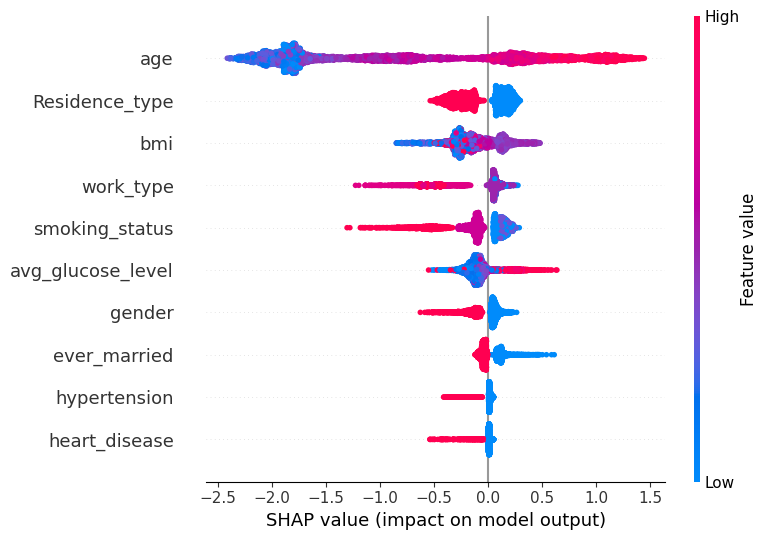

In [84]:
# prompt: Use SHAP library to interpret the XGBoost model – specifically, TreeExplainer. This method of SHAP, TreeExplainer, is optimized for tree-based models.  Visualize your explanations, one for positive and one for negative, using the  ‘force_plot’ function.  Note; You need to establish a ‘base value’ in order to be used by ‘force_plot’. The  explainer.expected_value is the ‘base value’.  Create the feature importance plot by calling SHAP’s ‘summary_plot’ function,  for each class / label.

import shap
shap.initjs()
explainer = shap.TreeExplainer(clf_XGB)
shap_values = explainer.shap_values(X)
# Create the feature importance plot
shap.summary_plot(shap_values, X)


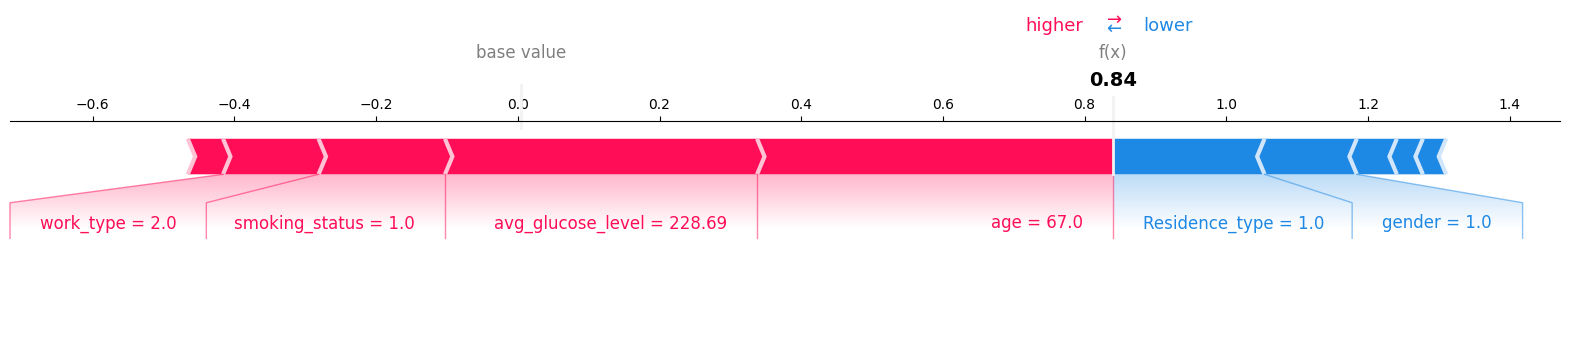

In [85]:

# Positive Label
shap.force_plot(explainer.expected_value, shap_values[0,:], pos_entry, matplotlib=True)

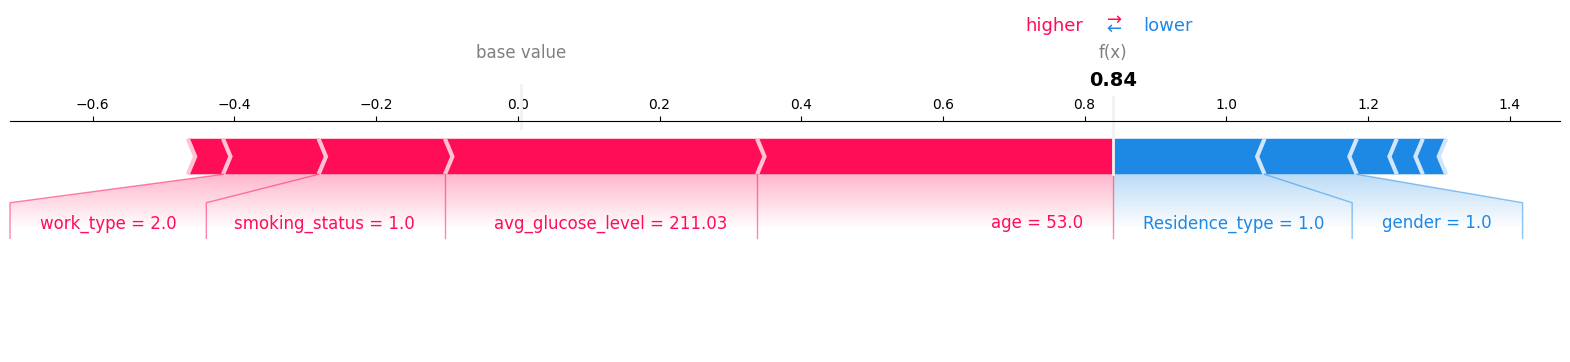

In [86]:
# Negative Label
shap.force_plot(explainer.expected_value, shap_values[0,:], neg_entry, matplotlib=True)

In [87]:
# Predict_probab for positive labels
prob_lr = clf_lr.predict_proba(pos_entry)
prob_dt = DT.predict_proba(pos_entry)
prob_rf = clf_RF.predict_proba(pos_entry)
prob_xgb = clf_XGB.predict_proba(pos_entry)
pos_compare_probab = pd.DataFrame({
  "Name": ["LR", "DT", "RF", "XGB"],
  "prob_F": [prob_lr[0][0], prob_dt[0][0], prob_rf[0][0],prob_xgb[0][0]],
  "prob_T": [prob_lr[0][1], prob_dt[0][1], prob_rf[0][1],prob_xgb[0][1]]
})
pos_compare_probab

Name    prob_F    prob_T
0   LR  0.660357  0.339643
1   DT  0.132353  0.867647
2   RF  0.253587  0.746413
3  XGB  0.301546  0.698454

In [88]:
# Predict_probab for negative labels
prob_lr = clf_lr.predict_proba(neg_entry)
prob_dt = DT.predict_proba(neg_entry)
prob_rf = clf_RF.predict_proba(neg_entry)
prob_xgb = clf_XGB.predict_proba(neg_entry)
neg_compare_probab = pd.DataFrame({
  "Name": ["LR", "DT", "RF", "XGB"],
  "prob_F": [prob_lr[0][0], prob_dt[0][0], prob_rf[0][0],prob_xgb[0][0]],
  "prob_T": [prob_lr[0][1], prob_dt[0][1], prob_rf[0][1],prob_xgb[0][1]]
})
neg_compare_probab

Name    prob_F    prob_T
0   LR  0.751842  0.248158
1   DT  1.000000  0.000000
2   RF  0.844460  0.155540
3  XGB  0.722712  0.277288

# **Conclusion**



*   If we will see from the feature importance time, serum_ceratinine and ejection fraction are the most important features which help in predicting the values accurately.
*   The lime is used to interpret the values of the model that whether we can rely on the model or not. So, according to our model the xgboost model is the one on which we can rely till 68% for prediction and 70% on random forest model.


*   From our model we can see that all those features are forcing the plot to the positive result that is happening of the death event.
*   So overall I can say that my models predicted very accurately for both negative and positive values. As we can see that decision tree and xgb models are overly fitted. The random forest and logistic regression models performed well.
Another observation is with the negative entries decision tree and random forest perfromed well but xgb and logistic regression are overly fitted.


